In [43]:
import torch
from torch import nn
from matplotlib_inline import backend_inline
from matplotlib import pyplot as plt

In [36]:
def determine_grid_interval(span):
    """根据给定的范围确定网格间隔"""
    if span <= 1:
        return 0.1
    elif span <= 2:
        return 0.5
    elif span <= 20:
        return 1
    elif span <= 50:
        return 50
    else:
        return 10
    

def plot(X, Y, xlabel, ylabel, figsize):
    # 使matplotlib绘制的图像为svg格式
    backend_inline.set_matplotlib_formats('svg')
    
    # 设置尺寸
    plt.figure(figsize=figsize)
    
    # 设置x y和对应标签
    plt.plot(X, Y)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    # 获取最大值，以确定网格线范围
    x_min, x_max = float(min(X)), float(max(X))
    y_min, y_max = float(min(Y)), float(max(Y))
    
    # 根据范围确定网格间隔
    x_interval = determine_grid_interval(x_max - x_min)
    y_interval = determine_grid_interval(y_max - y_min)
    
    # 设置网格线
    plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray')
    
    # 设置网格哪些位置有刻度
    plt.xticks(torch.arange(x_min, x_max + x_interval, x_interval))
    plt.yticks(torch.arange(y_min, y_max + y_interval, y_interval))
    
    plt.show()

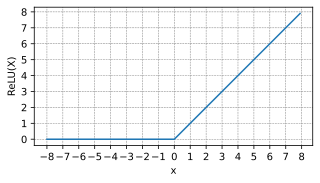

In [37]:
# ReLU
x = torch.arange(-8.0, 8.0, 0.1, requires_grad=True)
y = torch.relu(x)
plot(x.detach(), y.detach(), 'x', 'ReLU(X)', (5, 2.5))

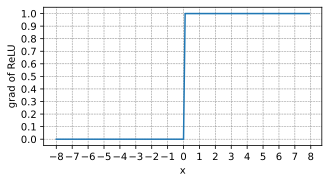

In [38]:
# ReLU的导数
y.backward(torch.ones_like(x), retain_graph=True)
# torch.ones_like(x): 这创建一个与x形状相同、值全为1的张量。
#    这个张量提供了关于哪些元素需要梯度的信息。在这个简单的例子中，我们希望直接对ReLU函数的每个值求导，所以为每个值提供了一个权重1。
# retain_graph=True: 在PyTorch中，每当调用.backward()时，默认情况下计算图会被释放，以节省内存，当再次调用.backward()会得到一个错误，因为计算图不再存在。
#    retain_graph=True阻止这种行为，允许多次调用.backward()。

plot(x.detach(), x.grad, 'x', 'grad of ReLU', (5, 2.5))

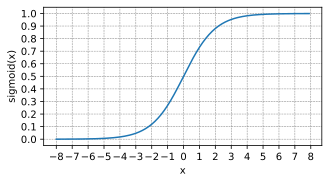

In [39]:
# sigmoid
y = torch.sigmoid(x)
plot(x.detach(), y.detach(), 'x', 'sigmoid(x)', (5, 2.5))

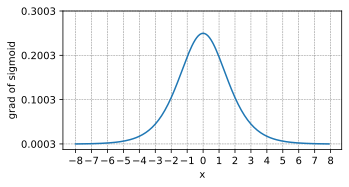

In [40]:
# sigmoid导数
# 需要清除之前的梯度
x.grad.data.zero_()
y.backward(torch.ones_like(x), retain_graph=True)
plot(x.detach(), x.grad, 'x', 'grad of sigmoid', (5, 2.5))

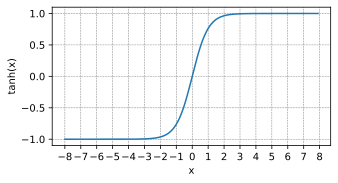

In [41]:
# tanh
y = torch.tanh(x)
plot(x.detach(), y.detach(), 'x', 'tanh(x)', (5, 2.5))

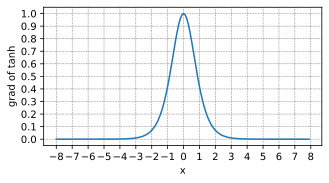

In [42]:
# tanh导数
x.grad.data.zero_()
y.backward(torch.ones_like(x), retain_graph=True)
plot(x.detach(), x.grad, 'x', 'grad of tanh', (5, 2.5))